In [31]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys

In [5]:
df=pd.read_csv("TNISurveyNew.csv")
df=df.drop("Timestamp",axis=1)
df.rename(columns={'Gender เพศ':'Gender',
                      'Degree ระดับการศึกษา':'Degree',
                      'Major of Study สาขา':'Major of Study',
                      'Year of Birth ปีเกิด':'Age',
                      'Mode of Transportation วิธีการเดินทาง':'Mode of Transportation',
                      'Most favourite food shop in TNI ร้านอาหารที่ชอบในTNI':'Most favourite food shop in TNI',
                      'Most favourite food shop near TNI ร้านอาหารที่ชอบใกล้TNI':'Most favourite food shop near TNI',
                   'Most favourite beverage shop ร้านเครื่องดื่มที่ชอบ':'Most favourite beverage shop',
                   'Most favourite vending machine ตู้กดอัตโนมัติที่ชอบ':'Most favourite vending machine',
                   'Most Favourite Sport Facilities กีฬาที่ชอบ':'Most Favourite Sport Facilities',
                  'Most favourite spot to relax สถานที่พักผ่อนที่ชอบ':'Most favourite spot to relax',
                  'Time spending in the library per week (hours) เวลาที่ใช้ในห้องสมุดต่อสัปดาห์':'Time spending in the library per week (hours)',
                  'Device Brand แบรนด์ของอุปกรณ์':'Device Brand',
                  'How do you spend per month คุณใช้จ่ายเท่าไรต่อเดือน':'How do you spend per month',
                  'Do you think the shops in the institute is expensive คุณคิดว่าสินค้าของร้านค้าในสถาบันมีราคาสูงหรือไม่':'Do you think the shops in the institute is expensive',
                  'Stress from Study ความเครียดจากการเรียน':'Stress from Study',
                  'Stress from Workload and Homework ความเครียดจากงานและการบ้าน':'Stress from Workload and Homework',
                  'Stress from Social interaction ความเครียดจากสังคม':'Stress from Social interaction',
                  'Stress from Lecturer ความเครียดจากอาจารย์ผู้สอน':'Stress from Lecturer',
                  'Stress from Family Situation ความเครียดจากครอบครัว':'Stress from Family Situation',
                  'How satisfied with the job prospect of TNI คุณพึงพอใจกับโอกาสในการได้รับงานจากTNIหรือไม่':'How satisfied with the job prospect of TNI',
                  'How satisfied with the language proficiency in English and Japanese คุณพึงพอใจกับทักษะระดับภาษาอังกฤษและญี่ปุ่นขนาดไหน':'How satisfied with the language proficiency in English and Japanese',
                  'How satisfied with the first aid room facility คุณพึงพอใจกับห้องปฐมพยาบาลหรือไม่':'How satisfied with the first aid room facility',
                  'Are you satisfied with the speed of the printing services shop คุณพึงพอใจกับความเร็วของร้านถ่ายเอกสารหรือไม่':'Are you satisfied with the speed of the printing services shop',
                  'Does cooperative shop has the item or goods you want สหกรณ์มีสินค้าที่คุณต้องการหรือไม่':'Does cooperative shop has the item or goods you want',
                  'Overall opinion about TNI ความคิดเห็นเกี่ยวกับTNI':'Overall opinion about TNI',
                  'Type of accommodation รูปแบบที่พักอาศัย':'Type of accommodation',
                  'How satisfied with the library คุณพึงพอใจกับห้องสมุดขนาดไหน':'How satisfied with the library',
                  'How satisfied with the WiFi and Internet คุณพึงพอใจกับไวไฟและอินเตอร์เน็ตขนาดไหน':'How satisfied with the WiFi and Internet',
                  'study tools and Devices อุปกรณ์ที่ใช้ในการเรียนรู้':'study tools and Devices'},inplace=True)

In [6]:
dithen={'Male/ชาย':'Male','Female/หญิง':'Female','LGBT/เพศทางเลือก':'LGBT','Prefer not to say/ไม่ระบุ':'NA',
        'Undergraduate/ปริญญาตรี':'Undergraduate','Master/ปริญญาโท':'Master',
       'Walk เดินเท้า':'Walk','Public Transport การเดินทางสาธารณะ':'Public Transport','Car รถยนต์':'Car','Motorbike จักรยานยนต์':'Motorbike',
       'Hiramiya Japanese Food ร้านอาหารญี่ปุ่นฮิรามิยะ':'Hiramiya Japanese Food','Hainanese chicken rice ข้าวมันไก่นายโส่ย':'Hainanese chicken rice',
       'Nima (Halal food) ร้านนิมา':'Nima (Halal food)','Snack shop ขนม-นม-เนย':'Snack shop','Fast food building D ป้ากาณจน์ ตึก D':'Fast food building D',
       'Kaizen ไข่เส้น':'Kaizen','Thai food shop ร้านคุณภา':'Thai food shop',
        'Green Steak shop สเต็กคุณพีซ (ร้านเขียว)':'Green Steak shop','Blue shop behind 7-11 เลิศวิลัย (ร้านฟ้า)':'Blue shop behind 7-11','Shop under blue building ร้านพี่นก (ร้านใต้ตึกฟ้า)':'Shop under blue building',
        'Kitty shop (japanese food) ร้านคิตตี้':'Kitty shop (japanese food)','Shop opposite blue building ร้านป้านิด (ร้านตรงข้ามตึกฟ้า)':'Shop opposite blue building','Beadouin steak and coffee เบดูอิน':'Beadouin steak and coffee',
        'Sunrise Coffee (Building A) ตึก A':'Sunrise Coffee (Building A)','Coffee Shop (Building B) ตึก B':'Coffee Shop (Building B)',
       'Infinity/เอมุ (Building E) ตึก E':'Amu (Building E)','Coffee Shop (Building D) ตึกD':'Coffee Shop (Building D)',
        'library ห้องสมุด':'library','E Building lounge เลานจ์ตึก E':'E Building lounge','Vacant Classroom ห้องเรียนที่ว่าง':'Vacant Classroom','M floor Building E ชั้นลอยตึก E':'M floor Building E',
        'less than 1 น้อยกว่า 1':'less than 1','less than 3,000 น้อยกว่า3,000':'less than 3,000','more than 10,000 มากกว่า10,000':'more than 10,000',
        'Dormitory หอพัก':'Dormitory','Condominium คอนโดมิเนียม':'Condominium','Detached House บ้านเดี่ยว':'Detached House','Apartment อพาร์ทเม้นท์':'Apartment','Town house ทาวน์เฮ้าส์':'Town house','Town home ทาวน์โฮม':'Town home',
       'Sometimes บางครั้ง':'Sometimes','Always มีตลอดเวลา':'Always','Never ไม่เคย':'Never'}
df['Gender'].replace(dithen, inplace=True)
df['Degree'].replace(dithen, inplace=True)
df['Mode of Transportation'].replace(dithen, inplace=True)
df['Age']=2022-df['Age']
df['Most favourite food shop in TNI'].replace(dithen, inplace=True)
df['Most favourite food shop near TNI'].replace(dithen, inplace=True)
df['Most favourite beverage shop'].replace(dithen, inplace=True)
df['Most favourite spot to relax'].replace(dithen, inplace=True)
df['Time spending in the library per week (hours)'].replace(dithen, inplace=True)
df['How do you spend per month'].replace(dithen, inplace=True)
df['Type of accommodation'].replace(dithen, inplace=True)
df['Does cooperative shop has the item or goods you want'].replace(dithen, inplace=True)
df['Stress from Lecturer'].replace(dithen, inplace=True)
df['Stress from Family Situation'].replace(dithen, inplace=True)
df['Stress from Study'].replace(dithen, inplace=True)
df['Major of Study'].replace(dithen, inplace=True)



df.head()

,Gender,Degree,Major of Study,Age,Mode of Transportation,Most favourite food shop in TNI,Most favourite food shop near TNI,Most favourite beverage shop,Most favourite vending machine,Most Favourite Sport Facilities,...,Stress from Lecturer,Stress from Family Situation,How satisfied with the job prospect of TNI,How satisfied with the language proficiency in English and Japanese,How satisfied with the first aid room facility,How satisfied with the library,How satisfied with the WiFi and Internet,Are you satisfied with the speed of the printing services shop,Does cooperative shop has the item or goods you want,Overall opinion about TNI
0,Male,Undergraduate,DSA,21,Walk,Hainanese chicken rice,Green Steak shop,Amu (Building E),7-11,Table Tennis,...,3,4,4,3,3,4,4,3,Sometimes,4
1,Male,Undergraduate,DGE,18,Walk,Hiramiya Japanese Food,Shop opposite blue building,Amu (Building E),7-11,Badminton court,...,1,2,5,5,3,5,4,4,Sometimes,5
2,Female,Undergraduate,JIB,18,Car,Snack shop,7-11,Coffee Shop (Building B),7-11,Gym,...,2,2,5,5,3,3,4,5,Always,5
3,Female,Undergraduate,DSA,20,Walk,Hainanese chicken rice,Green Steak shop,Coffee Shop (Building B),7-11,Badminton court,...,3,3,4,3,3,4,4,3,Sometimes,4
4,Female,Undergraduate,DSA,20,Walk,Hiramiya Japanese Food,Shop under blue building,Sunrise Coffee (Building A),7-11,Basketball / Volley ball,...,1,1,5,4,3,4,4,3,Sometimes,5


## Bar Chart

<AxesSubplot:xlabel='Major of Study', ylabel='Stress from Study'>

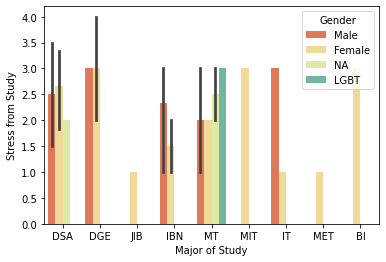

In [50]:
Major = df['Major of Study']
StressS = df['Stress from Study']
sns.barplot(data=df, x="Major of Study", y="Stress from Study", hue="Gender", palette="Spectral")

<AxesSubplot:xlabel='Major of Study', ylabel='Count'>

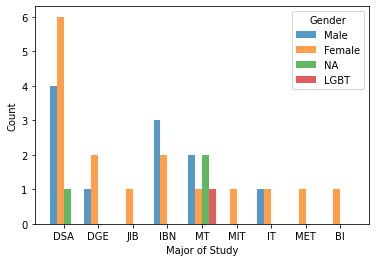

In [53]:
sns.histplot(data=df, x="Major of Study", hue="Gender", multiple="dodge", shrink=.8, edgecolor="none", palette="cubehelix")

## Pie Chart

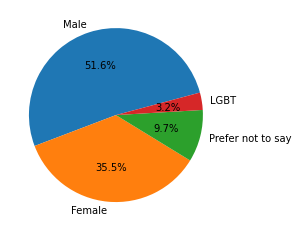

In [7]:
my_labels = 'Male', 'Female', 'Prefer not to say', 'LGBT'
plt.pie(df['Gender'].value_counts(), labels=my_labels, autopct='%1.1f%%', startangle=15)
plt.show()

## Histogram

<AxesSubplot:ylabel='Frequency'>

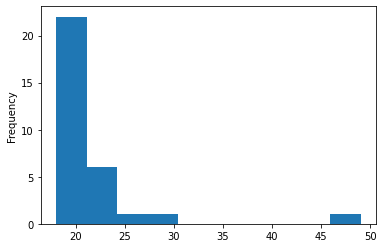

In [ ]:
df['Age'].plot(kind='hist')

## Heatmap

<AxesSubplot:>

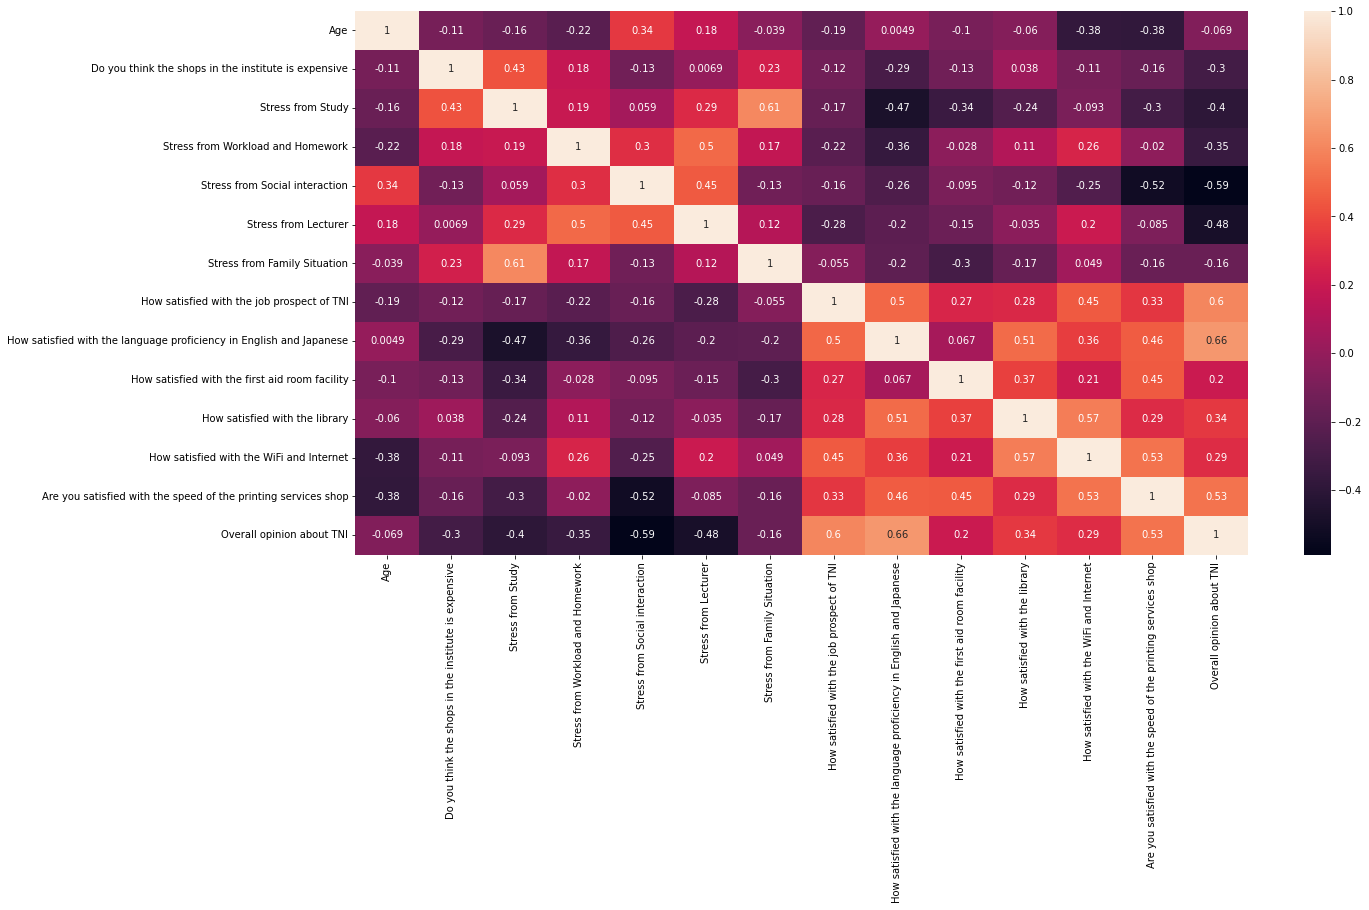

In [16]:
df2= df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(df2, annot =True)

## Boxplot

<AxesSubplot:xlabel='Gender', ylabel='Stress from Study'>

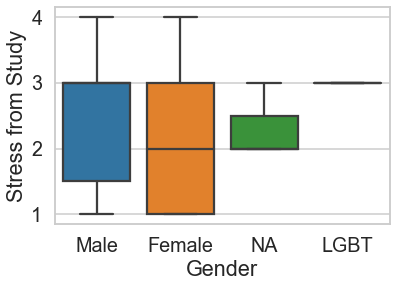

In [23]:
sns.set_style("whitegrid")

sns.boxplot(x = 'Gender', y = 'Stress from Study', data = df)

## Bubble plot

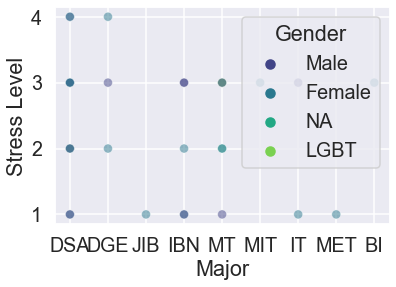

In [33]:
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="Major of Study", y="Stress from Study", hue="Gender", palette="viridis", edgecolors="black", alpha=0.5, sizes=(500, 500))

plt.xlabel("Major")
plt.ylabel("Stress Level")

# show the graph
plt.show()


## Scatter Plot

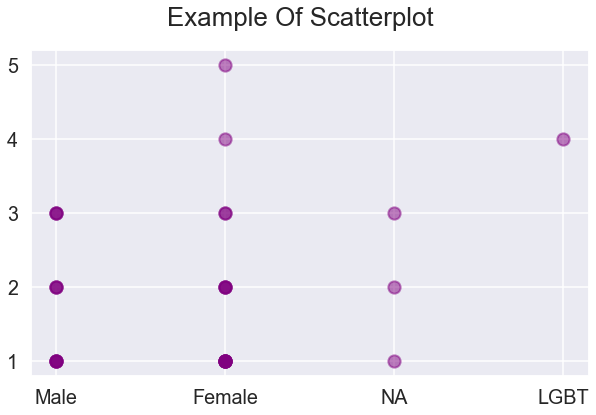

In [35]:
# Data
x = df["Gender"]
y = df["Stress from Lecturer"]

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Example Of Scatterplot')

# Create the Scatter Plot
ax.scatter(x, y,
            color="purple",    # Color of the dots
            s=150,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=2)    # Size of edge around the dots


# Show the plot